## 1. Import Necessary Libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# wordcloud for text visualization
from wordcloud import WordCloud
# nltk for text processing 
import nltk
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
stop_words = stopwords.words('english') # all stop words in lower case
import unicodedata

## 2. Import Data 

In [3]:
df = pd.read_csv('text2.csv')[['text', 'sentiment']]

In [4]:
df.sample(10)

,text,sentiment
8785,Sorry I can not reach either URL,negative
7377,"Eating Toast ~Peanut Butter,,Yum",positive
6136,chillin promoting muzik...not eating lmaao,positive
16501,_ i know ! my BG looks emo now .! lol,neutral
15682,Hulu no work in Canada,neutral
13287,John - more present than ever- even online #...,neutral
21540,its Gloomy in LA no sun but its nice,neutral
22966,missing ontario..,neutral
17556,"Its 4.30am, sleep timeee. I wanted to watch Go...",negative
476,i think it`s under a honeymoon by the good li...,neutral


In [5]:
df.shape

(27481, 2)

## 3. Data Cleaning 

### 3.1 Information about Data

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       27480 non-null  object
 1   sentiment  27481 non-null  object
dtypes: object(2)
memory usage: 429.5+ KB


### 3.2 Check Missing Values

In [5]:
df.isnull().sum()

text         1
sentiment    0
dtype: int64

### 3.3 Drop Missing Values

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

text         0
sentiment    0
dtype: int64

### 3.4 Check Duplicate Values

In [9]:
df.duplicated().sum()

0

In [10]:
df.shape

(27480, 2)

## 4. EDA

In [11]:
df.sample(5)

,text,sentiment
13897,@ work again,neutral
9096,"You mustv`e read my mind. I WAS going, but no...",neutral
26110,Dang me too! It`s only a 4 hour drive! Too ba...,negative
21824,I love music so much that i`ve gone through pa...,negative
14929,Is not looking forward to the LSAT,neutral


### 4.1 Neutral, Positive and Negative Percentage

In [12]:
values_count = df['sentiment'].value_counts()
values_count

sentiment
neutral     11117
positive     8582
negative     7781
Name: count, dtype: int64

In [13]:
# Calculate the percentages
neutral_percentage = values_count.iloc[0] / df.shape[0]
positive_percentage = values_count.iloc[1] / df.shape[0]
negative_percentage = values_count.iloc[2] / df.shape[0]

# Print the percentages
print(f'Percentage of Neutral sentiments: {neutral_percentage}')
print(f'Percentage of Positive sentiments: {positive_percentage}')
print(f'Percentage of Negative sentiments: {negative_percentage}')

Percentage of Neutral sentiments: 0.40454876273653567
Percentage of Positive sentiments: 0.3122998544395924
Percentage of Negative sentiments: 0.2831513828238719


In [8]:
# encode sentiment column 
df['target'] = df.sentiment.map({
    'negative': 0,
    'positive': 1,
    'neutral': 2,
})

Text(0.5, 1.0, 'Text Classification')

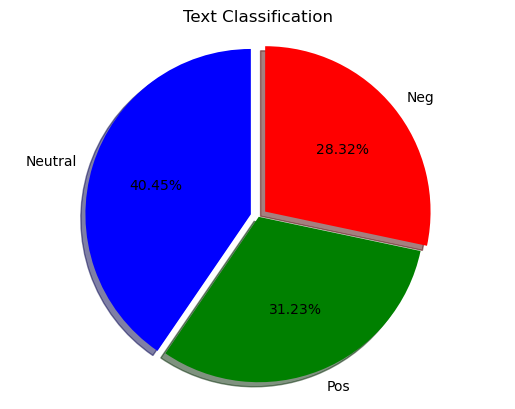

In [57]:
# Create the pie chart with custom colors, labels, explode parameter, and shadow
colors = ['blue','green', 'red']
explode = (.05, 0, .05)

plt.pie(values_count, labels=['Neutral','Pos', 'Neg'] ,explode=explode, colors=colors,
       shadow=True, startangle=90, autopct='%0.2f%%')

plt.axis('equal')
plt.title('Text Classification')

### 4.2 Text Length and Structure Analysis

In [9]:
# get number of words in each text
df['num_words'] = df['text'].apply(lambda x: len(word_tokenize(x)))
# get number of sentences in each text
df['num_sent'] = df['text'].apply(lambda x: len(sent_tokenize(x)))

In [59]:
df.head()

,text,sentiment,target,num_words,num_sent
0,"I`d have responded, if I were going",neutral,2,10,1
1,Sooo SAD I will miss you here in San Diego!!!,negative,0,13,2
2,my boss is bullying me...,negative,0,6,1
3,what interview! leave me alone,negative,0,6,2
4,"Sons of ****, why couldn`t they put them on t...",negative,0,20,1


### 4.3 Summary Statistics for Positive sentences

In [92]:
df[df['target']==1][['num_words', 'num_sent']].describe() 

,num_words,num_sent
count,8582.000000,8582.000000
mean,16.269518,1.835470
std,8.299568,0.988907
min,1.000000,1.000000
25%,9.000000,1.000000
50%,15.000000,2.000000
75%,23.000000,2.000000
max,55.000000,19.000000


### 4.4 Summary Statistics for Negative sentences

In [93]:
df[df['target']==0][['num_words', 'num_sent']].describe() 

,num_words,num_sent
count,7781.000000,7781.000000
mean,16.756587,1.706593
std,8.536245,0.914546
min,1.000000,1.000000
25%,10.000000,1.000000
50%,16.000000,1.000000
75%,23.000000,2.000000
max,63.000000,10.000000


### 4.5 Coorelation HeatMap

In [18]:
corr_matrix = df[['target', 'num_words', 'num_sent']].corr()
corr_matrix

,sentiment,num_words,num_sent
sentiment,1.000000,-0.078802,-0.043521
num_words,-0.078802,1.000000,0.512511
num_sent,-0.043521,0.512511,1.000000


In [19]:
print(corr_matrix.dtypes)


sentiment    float64
num_words    float64
num_sent     float64
dtype: object


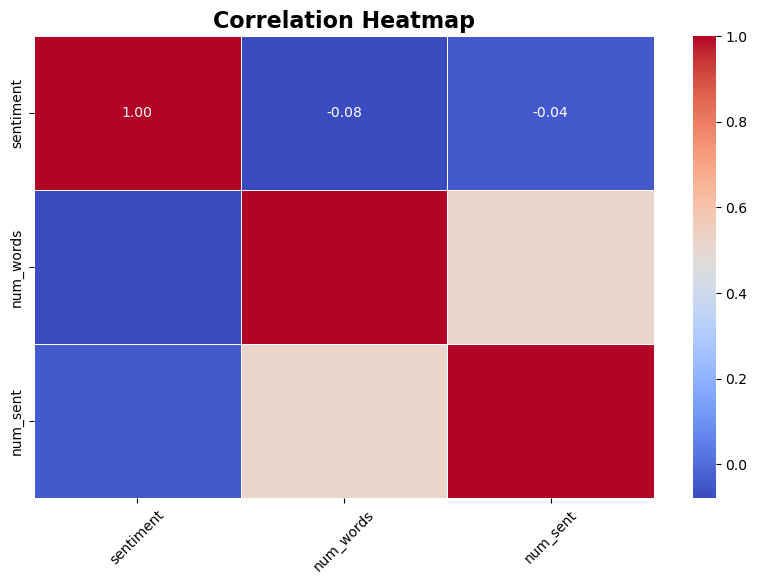

In [20]:
# Create a heatmap with custom styling
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

# Set a title for the heatmap
plt.title("Correlation Heatmap", fontsize=16, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the heatmap
plt.show()

## 5. Preprocessing Fuctions

### 5.1 Removing hyperlinks
- for example: "https://google.com"

In [10]:
import re

def remove_url(text):
  url_pattern = re.compile(r'https?://\S+|www\.\S+')
  return url_pattern.sub(r'', text)

### 5.2 Removing punctuation


In [11]:
ex = df['text'].loc[7523]
ex

'to doente'

In [12]:
dic1 = {':(': '1', ':)': '2', ':-)': '3', ':-(': '4'}
dic2 = {'1': ':(', '2': ':)', '3': ':-)', '4': ':-('}

In [165]:
import string

punctuations = string.punctuation

def nltk_remove_punkt(text):
  # replace our emoji by number   
  # for key in dic1.keys():
  #     if key in text:
  #         text = text.replace(key, dic1[key])
 
  punctuations = string.punctuation

  text = [word for word in text if word not in punctuations]

  
  return ''.join(text).strip()

In [14]:
nltk_remove_punkt(ex)

'to doente'

### 5.3 Mention and newline

In [15]:
def mentions(text):
    # Replace \n by space
    text = text.replace('\n', ' ')
    
    # Remove @ and any word after it
    text = re.sub(r'@\w+', '', text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

In [16]:
ex = df['text'].loc[8259]
ex

'and i wish i gave you one last kiss'

In [17]:
e = mentions(ex)
num_txt = nltk_remove_punkt(e)
e, num_txt

('and i wish i gave you one last kiss', 'and i wish i gave you one last kiss')

### 5.4 Removing hashtags


In [18]:
def remove_tags(text):
  tags_pattern = r'<.*?>'
  return re.sub(tags_pattern, '', text).strip()

### 5.5 Removing stopwords


In [19]:
print('not' in stop_words) #note: all stopwords are lowercase
print(stop_words)

True
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'tha

In [20]:
# remove not from stop words 
stop_words.remove('not')
print('not' in stop_words) 

False


In [21]:
def remove_stop_words(text, stop_words):
  tokens = text.lower().split()
  # print(f'text tokens: {tokens}')
  text = [word for word in tokens if word not in stop_words]

  return ' '.join(text).strip()


### 5.6 Remove inner spaces


In [22]:
num_txt

'and i wish i gave you one last kiss'

In [166]:
def remove_inner_spaces(text):
   # return our emoji using it's number 
    # text = text.split()
    # # print(text)
    # for key in dic2.keys():
    #   if key in text:
    #       index = text.index(key)
    #       text[index] = dic2[key]
    # # print(text)
    # text = ' '.join(text)
    # print(text)
    return re.sub(r'\s\s+', ' ', text)

In [24]:
remove_inner_spaces(num_txt)

'and i wish i gave you one last kiss'

### 5.7 Stemming 

In [25]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [26]:
text = "I was running and jumped over the puddles while talking to my friend"

In [27]:
def stemming(text):
    text = text.split()
    # print(text)
    stemmed_words = [ps.stem(word) for word in text ]

    return ' '.join(stemmed_words)

In [28]:
stemming(text)

'i wa run and jump over the puddl while talk to my friend'

## 6. Data Preprocessing

### 6.1 Text Normalization 

In [167]:
# Function to normalize text
def normalize_text(text):
    # Remove URLs
    text = remove_url(text)
    # print('Remove URLs: ', text)
    # Remove HTML tags
    text = remove_tags(text)
    # print('Remove HTML: ', text)
    # Remove mentions and newlines 
    text = mentions(text)
    # print('Remove mentions: ', text)
    # Remove punctuation using NLTK's built-in function
    text = nltk_remove_punkt(text)
    # print('Remove punctuation: ', text)
    # Remove stopwords (common words like 'the', 'is', etc.)
    text = remove_stop_words(text, stop_words)
    # print('Remove stopwords: ', text)
    # Remove extra spaces between words
    text = remove_inner_spaces(text)
    # print('Remove extra spaces: ', text)
    # Stemming words 
    # text = stemming(text)

    return text

In [30]:
df.sample(3)

,text,sentiment,target,num_words,num_sent
25378,tell your grandmother i say hello,neutral,2,6,1
3887,!!! Tell us your experience! I Loveeeee Youu!,positive,1,12,4
3227,"Bank Holiday Bliss - Jeremy Kyle, without even...",positive,1,12,1


In [31]:
ex = df['text'].loc[73]
ex

"'you can ride one, you can catch one, but its not summer til you pop open one'  ?"

In [32]:
normalize_text(ex)

'ride one catch one not summer til pop open one'

### 6.2 Normalize Text Column

In [33]:
df.head()

,text,sentiment,target,num_words,num_sent
0,"I`d have responded, if I were going",neutral,2,10,1
1,Sooo SAD I will miss you here in San Diego!!!,negative,0,13,2
2,my boss is bullying me...,negative,0,6,1
3,what interview! leave me alone,negative,0,6,2
4,"Sons of ****, why couldn`t they put them on t...",negative,0,20,1


In [34]:
df['normalized_text'] = df['text'].apply(normalize_text)

In [35]:
df.head()

,text,sentiment,target,num_words,num_sent,normalized_text
0,"I`d have responded, if I were going",neutral,2,10,1,id responded going
1,Sooo SAD I will miss you here in San Diego!!!,negative,0,13,2,sooo sad miss san diego
2,my boss is bullying me...,negative,0,6,1,boss bullying
3,what interview! leave me alone,negative,0,6,2,interview leave alone
4,"Sons of ****, why couldn`t they put them on t...",negative,0,20,1,sons couldnt put releases already bought


### 6.3 Text Visualization Using WordCloud

In [66]:
# get text of each category 
negative_text = ' '.join(df[df['target']==0]['normalized_text'])
positive_text = ' '.join(df[df['target']==1]['normalized_text'])
neutral_text = ' '.join(df[df['target']==2]['normalized_text'])

In [72]:
# create wordcloud and visuliztion function 
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)
    plt.figure(figsize=(10, 8))
    plt.title(title)
    plt.axis('off')
    plt.imshow(wordcloud, interpolation='bilinear')

#### WordCloud For Negative Text

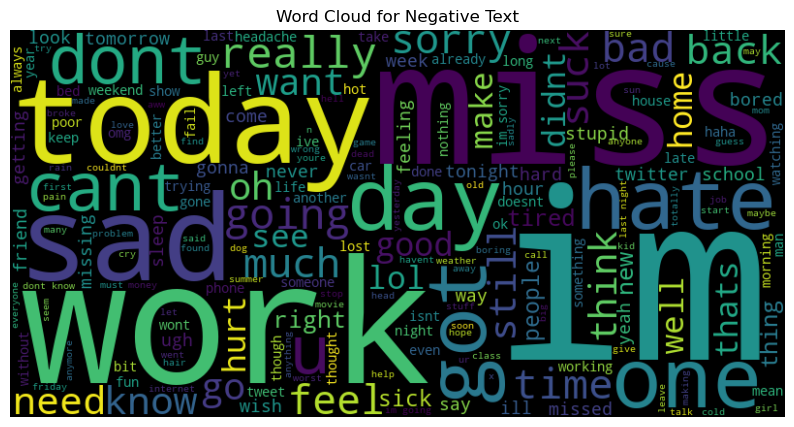

In [73]:
create_wordcloud(negative_text, 'Word Cloud for Negative Text')

#### WordCloud For Positive Text

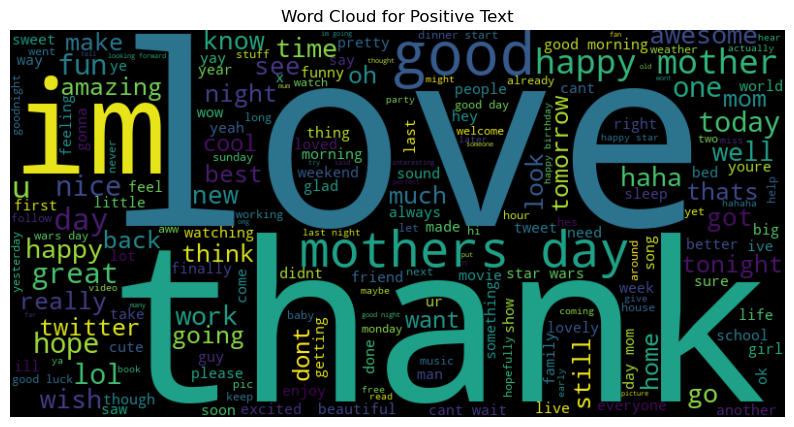

In [74]:
create_wordcloud(positive_text, 'Word Cloud for Positive Text')

#### WordCloud For Neutral Text

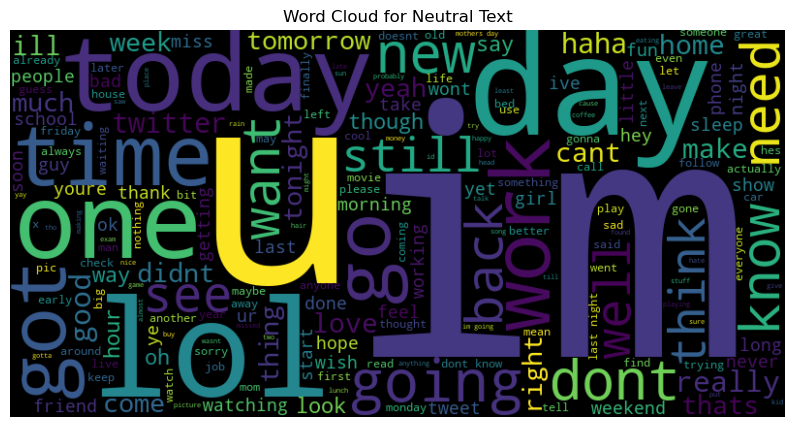

In [75]:
create_wordcloud(neutral_text, 'Word Cloud for Neutral Text')

### 6.4 Split Data

In [78]:
df.head()

,text,sentiment,target,num_words,num_sent,normalized_text
0,"I`d have responded, if I were going",neutral,2,10,1,id responded going
1,Sooo SAD I will miss you here in San Diego!!!,negative,0,13,2,sooo sad miss san diego
2,my boss is bullying me...,negative,0,6,1,boss bullying
3,what interview! leave me alone,negative,0,6,2,interview leave alone
4,"Sons of ****, why couldn`t they put them on t...",negative,0,20,1,sons couldnt put releases already bought


In [82]:
df.target

0        2
1        0
2        0
3        0
4        0
        ..
27476    0
27477    0
27478    1
27479    1
27480    2
Name: target, Length: 27480, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.normalized_text, 
    df.target, 
    test_size=.2, 
    random_state= 21, 
    stratify=df.target
)

In [37]:
y_train.value_counts()

2    8894
1    6865
0    6225
Name: target, dtype: int64

In [38]:
y_test.value_counts()

2    2223
1    1717
0    1556
Name: target, dtype: int64

## 7. Modeling

### 7.1 LSTM and Embedding Model 

#### 7.1.1 Prepare Data and Create Embedding Matrix

In [88]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

In [40]:
# Initialize the tokenizer
tokenizer = Tokenizer(num_words=10000)
# generate vocabulary 
tokenizer.fit_on_texts(X_train)
# convert data to sequences 
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [1]:
# print(tokenizer.index_word)

In [108]:
# Search for the word in X_train
matches = X_train[X_train.str.contains('makes want', case=False, na=False)]

print(matches)

21496                 paramore makes want punch babies lol
4031     sure want know makes want run news happy star ...
21394    aaaa need work today cant ever get weekends ma...
23903    misses jp not know iv given headache thinking ...
Name: normalized_text, dtype: object


In [109]:
X_train[21496]

'paramore makes want punch babies lol'

In [107]:
X_train_sequences[1]

[1635, 200, 30, 3706, 1524, 16]

In [42]:
# get max length 
max_length = max([len(seq) for seq in X_train_sequences]) + 2
max_length

25

In [43]:
# padding each sequance to max len by zeros
X_train_pad = pad_sequences(X_train_sequences, maxlen=max_length, padding='post')
X_test_pad = pad_sequences(X_test_sequences, maxlen=max_length, padding='post')

In [44]:
X_train_pad[0]

array([ 110,   62, 8777, 2222, 1113,  619, 1523,    8,   23,  196,  391,
        902,   89,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0])

In [45]:
import gensim.downloader as api 
# show the available models 
api.info()['models'].keys()

dict_keys(['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis'])

In [46]:
# load pretrained word embedding model
w2v_model = api.load('glove-twitter-200')
# Get the vector for any word
w2v_model['makes']

array([ 1.9764e-01,  2.4092e-02,  2.5227e-01,  2.3382e-01, -6.8030e-02,
        1.1086e-01,  8.3163e-01, -3.6819e-01, -1.5272e-01, -2.6397e-01,
       -1.5454e-01, -5.8309e-01, -1.3615e+00, -1.9403e-01,  1.6419e-01,
       -2.7829e-01, -4.6402e-01,  1.3429e-01,  2.4621e-01,  1.5476e-02,
       -3.3749e-02,  3.4958e-02,  1.4622e-01,  7.8476e-03, -3.7565e-01,
        1.1579e+00,  5.6747e-02,  7.5433e-01, -9.3553e-02,  3.4237e-01,
        1.2520e-01, -1.3961e-01,  1.9210e-01, -1.0727e-01, -6.5434e-01,
        3.2083e-02, -2.4295e-02, -1.8390e-01,  3.1903e-01,  3.5315e-01,
        5.8635e-01, -1.6038e-01,  3.3046e-01,  3.0461e-02, -1.3704e-01,
        2.1994e-01,  5.9414e-01,  2.1245e-01, -4.7203e-01, -7.8504e-02,
        7.1167e-02, -1.2408e-01,  2.4925e-01,  1.0885e-01, -8.5112e-02,
       -6.2877e-02,  4.6017e-01,  3.2029e-01, -2.5464e-02, -3.3114e-02,
       -9.7977e-02, -5.6838e-01,  1.3093e-03, -2.3614e-01,  3.2203e-01,
       -1.7817e-01, -2.3137e-01,  2.5457e-01, -3.9119e-01,  1.50

In [138]:
# create embedding matrix
word_index = tokenizer.word_index
embedding_dims = w2v_model.vector_size
embedding_matrix = np.zeros((len(word_index)+1, embedding_dims))

for word, i in word_index.items():
    if word in w2v_model:
        embedding_matrix[i] = w2v_model[word]
    else:
         # Initialize missing word embeddings randomly
        embedding_matrix[i] = np.random.normal(size=(embedding_dims,))

In [71]:
s = list(word_index.keys())[0]
print(s)
# w2v_model.similarity(s, "you")
w2v_model[s]

im


array([-2.4256e-01,  2.0028e-01, -4.9502e-01, -2.4575e-02, -7.1435e-01,
        5.4786e-01,  1.8239e-01,  3.2241e-02, -1.3365e-01,  3.7830e-02,
       -3.5530e-01, -3.4984e-01, -2.5947e-01, -5.1275e-02,  1.4079e-03,
       -2.3641e-01,  3.3077e-01,  3.1252e-01, -2.4499e-01, -2.8256e-01,
       -2.6944e-01, -1.3247e-01,  3.6479e-01, -3.0167e-01, -5.8063e-01,
        1.0106e+00,  5.3939e-02, -6.4180e-02, -3.3961e-01, -1.1110e-01,
       -4.5779e-01, -6.4570e-01, -2.4470e-01, -4.5539e-01, -5.9880e-01,
        2.0997e-01, -3.2312e-01, -6.5659e-02, -1.8834e-01,  4.5236e-01,
       -2.1475e-01, -3.8143e-01,  6.6630e-01, -3.0974e-03, -4.0830e-01,
        3.0035e-01,  7.5316e-01, -7.9690e-02, -5.9304e-01,  3.8365e-01,
       -3.4045e-01, -6.3930e-01, -2.4473e-01, -6.5955e-01,  2.9458e-01,
       -3.9582e-01, -5.2221e-01, -3.2523e-01, -2.5269e-02, -1.1590e-01,
       -4.5863e-01, -1.4621e-01,  7.8290e-01, -9.5087e-01, -5.0738e-01,
       -2.6490e-01, -1.2885e-01,  5.2800e-01,  2.2536e-01,  4.32

In [73]:
embedding_matrix.shape

(24011, 200)

#### 7.1.2 Build and Train Model

In [116]:
from tensorflow.keras.regularizers import l2

In [149]:
model = Sequential()
# convert sequences of word indices into sequences of dense vectors
# Embedding layer
model.add(Embedding(
    input_dim=len(word_index) + 1,  # 1 for padding at index 0
    output_dim=embedding_dims,
    weights=[embedding_matrix],
    # input_length=max_length,  
    trainable=False))

# first lstm layer 
model.add(LSTM(128, return_sequences=True, kernel_regularizer=l2(.01)))
model.add(Dropout(.5))

# second lstm layer 
model.add(LSTM(64, return_sequences=False, kernel_regularizer=l2(.01)))
model.add(Dropout(.5))

# dense layer for classigication
model.add(Dense(3, activation='softmax'))

In [150]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_13 (Embedding)             │ ?                           │       4,802,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_24 (LSTM)                       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_25 (LSTM)                       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,802,200 (18.32 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 4,802,200 (18.32 MB)

In [151]:
from tensorflow.keras.optimizers import Adam

In [152]:
# complie model
model.compile(
    optimizer = Adam(learning_rate=.01),
    loss = 'sparse_categorical_crossentropy',
    metrics= ['accuracy']
)

In [98]:
y_train.size

21984

In [99]:
X_train_pad.shape

(21984, 25)

In [142]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(
    'best.keras', 
    save_best_only=True,
    verbose=1
)

In [143]:
# train model 
hist = model.fit(X_train_pad, y_train,
          epochs=30,
          batch_size=64,
          validation_data=(X_test_pad, y_test),
          callbacks=[checkpoint])

Epoch 1/30
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.4712 - loss: 1.4221
Epoch 1: val_loss improved from inf to 1.10159, saving model to best.keras
344/344 ━━━━━━━━━━━━━━━━━━━━ 39s 87ms/step - accuracy: 0.4713 - loss: 1.4213 - val_accuracy: 0.5300 - val_loss: 1.1016
Epoch 2/30
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.6188 - loss: 0.9993
Epoch 2: val_loss improved from 1.10159 to 0.87275, saving model to best.keras
344/344 ━━━━━━━━━━━━━━━━━━━━ 27s 79ms/step - accuracy: 0.6188 - loss: 0.9992 - val_accuracy: 0.6652 - val_loss: 0.8727
Epoch 3/30
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.6668 - loss: 0.8795
Epoch 3: val_loss improved from 0.87275 to 0.83969, saving model to best.keras
344/344 ━━━━━━━━━━━━━━━━━━━━ 29s 84ms/step - accuracy: 0.6668 - loss: 0.8795 - val_accuracy: 0.6869 - val_loss: 0.8397
Epoch 4/30
344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.6880 - loss: 0.8670
Epoch 4: val_loss did not improve from 0.83969
344/344 ━━━━━━━

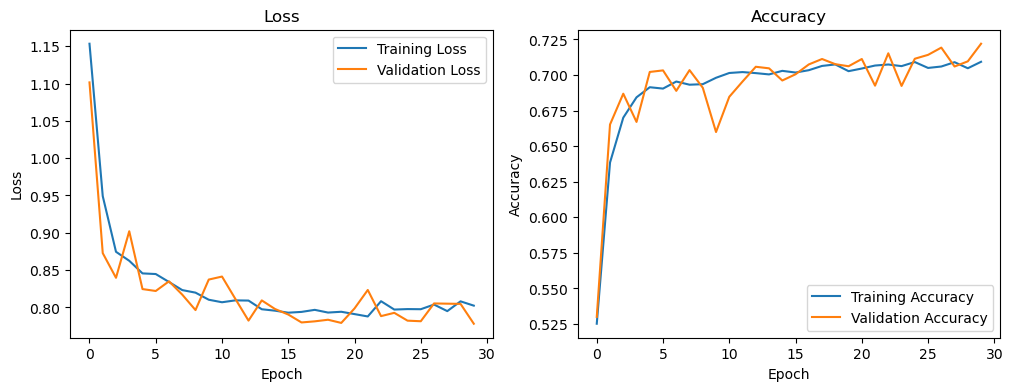

In [153]:
import matplotlib.pyplot as plt

# Extract the data from the history object
loss = hist.history['loss']
val_loss = hist.history['val_loss']
accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']

# Plot loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [154]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('best.keras')

## 8. Pediction Pipeline

In [198]:
# Define the prediction pipeline
def predict(text, model=model, tokenizer=tokenizer, max_length = 25):
    # Step 1: Normalize the text
    normalized_text = normalize_text(text)
    
    # Step 2: Tokenize the text
    sequence = tokenizer.texts_to_sequences([normalized_text])
    
    # Step 3: Pad the sequence
    padded_sequence = pad_sequences(sequence, maxlen=max_length, padding='post')
    
    # Step 4: Make a prediction
    prediction = np.squeeze(model.predict(padded_sequence))

    # get prediction index
    predicted_index = np.argmax(prediction)

    if predicted_index == 0:
        return(f'Ngative sentiment -> {prediction[predicted_index]}')

    elif predicted_index == 1:
        return(f'Positive sentiment -> {prediction[predicted_index]}')
    
    elif predicted_index == 2:
        return(f'Neutral sentiment -> {prediction[predicted_index]}')

In [199]:
# try positive sentiment 
input_text = "Just finished an incredible book that changed my perspective on life. The author’s insights were so profound, and I couldn’t put it down! Highly recommend it to everyone looking for a good read. #BookLovers #Inspiration #MustRead"
predict(input_text)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


'Positive sentiment -> 0.97662353515625'

In [200]:
# try negative sentiment 
input_text = 'What a terrible experience at the customer service desk today. Waited for over an hour just to be told they couldn’t help me with my issue. Completely unacceptable and a huge waste of time. Definitely not coming back. #CustomerServiceFail #Frustrated'
predict(input_text)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


'Ngative sentiment -> 0.648470401763916'

In [201]:
# try neutral sentiment 
input_text = 'Attended a lecture on urban planning this afternoon. The speaker discussed various approaches to sustainable city development and highlighted some successful case studies. Informative and thought-provoking session. #UrbanPlanning #Sustainability #Lecture"'
predict(input_text)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


'Neutral sentiment -> 0.7310582995414734'

In [ ]:
x